### 2. Выбор модели для прогнозирования ВВП ЕС

In [69]:
library(forecast)
library(ggplot2)
library(dplyr)


## ЕС

In [70]:
df_eu  <-  read.csv(file="../data_hts/hts_eu_a10.csv", header=TRUE, sep=",", row.names =1 )
df_eu  <-  df_eu/1000
var_freq  <- 4    
var_start_year  <- 2000   
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [71]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [72]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [73]:
var_h  <- 8

In [74]:
var_window  <-  48
var_cv_low   <- 48
var_cv_high   <- 67

### tsCV()

In [8]:
var_freq  <- 4    
var_start_year  <- 2000   
var_h  <- 8
var_window  <-  48 - 1
var_topup  <-  1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

ac <- c()
for (i in 0:(var_iter*var_freq)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    }

[1] 2000.00 2011.75 2012.00 2013.75
[1] 2000.25 2012.00 2012.25 2014.00
[1] 2000.50 2012.25 2012.50 2014.25
[1] 2000.75 2012.50 2012.75 2014.50
[1] 2001.00 2012.75 2013.00 2014.75
[1] 2001.25 2013.00 2013.25 2015.00
[1] 2001.50 2013.25 2013.50 2015.25
[1] 2001.75 2013.50 2013.75 2015.50
[1] 2002.00 2013.75 2014.00 2015.75
[1] 2002.25 2014.00 2014.25 2016.00
[1] 2002.50 2014.25 2014.50 2016.25
[1] 2002.75 2014.50 2014.75 2016.50
[1] 2003.00 2014.75 2015.00 2016.75
[1] 2003.25 2015.00 2015.25 2017.00
[1] 2003.50 2015.25 2015.50 2017.25
[1] 2003.75 2015.50 2015.75 2017.50
[1] 2004.00 2015.75 2016.00 2017.75
[1] 2004.25 2016.00 2016.25 2018.00
[1] 2004.50 2016.25 2016.50 2018.25
[1] 2004.75 2016.50 2016.75 2018.50
[1] 2005.00 2016.75 2017.00 2018.75


In [9]:
var_freq  <- 4    
var_start_year  <- 2000   
var_h  <- var_h
var_window  <-  48 - 1
var_topup  <-  1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2


In [10]:
ac <- list()

for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
#         test <- window(gdp_agg, start=test_start-1/var_freq)
         break
    }
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

#     test <- window(gdp_agg, start=test_start, end=test_end)
    

    
    gdp_arima  <- forecast(Arima(train, order=c(3,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.mean = TRUE), h = 8  )

#     print(test)
#     print(gdp_arima)
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    
    }

[1] 2000.00 2011.75 2012.00 2013.75
[1] 2000.25 2012.00 2012.25 2014.00
[1] 2000.50 2012.25 2012.50 2014.25
[1] 2000.75 2012.50 2012.75 2014.50
[1] 2001.00 2012.75 2013.00 2014.75
[1] 2001.25 2013.00 2013.25 2015.00
[1] 2001.50 2013.25 2013.50 2015.25
[1] 2001.75 2013.50 2013.75 2015.50
[1] 2002.00 2013.75 2014.00 2015.75
[1] 2002.25 2014.00 2014.25 2016.00
[1] 2002.50 2014.25 2014.50 2016.25
[1] 2002.75 2014.50 2014.75 2016.50
[1] 2003.00 2014.75 2015.00 2016.75
[1] 2003.25 2015.00 2015.25 2017.00
[1] 2003.50 2015.25 2015.50 2017.25
[1] 2003.75 2015.50 2015.75 2017.50
[1] 2004.00 2015.75 2016.00 2017.75
[1] 2004.25 2016.00 2016.25 2018.00
[1] 2004.50 2016.25 2016.50 2018.25
[1] 2004.75 2016.50 2016.75 2018.50


In [11]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [12]:
var_iter

[1] 5

In [13]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [14]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [15]:
# Basic line plot with points

plots_train_test  <-  list()

var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



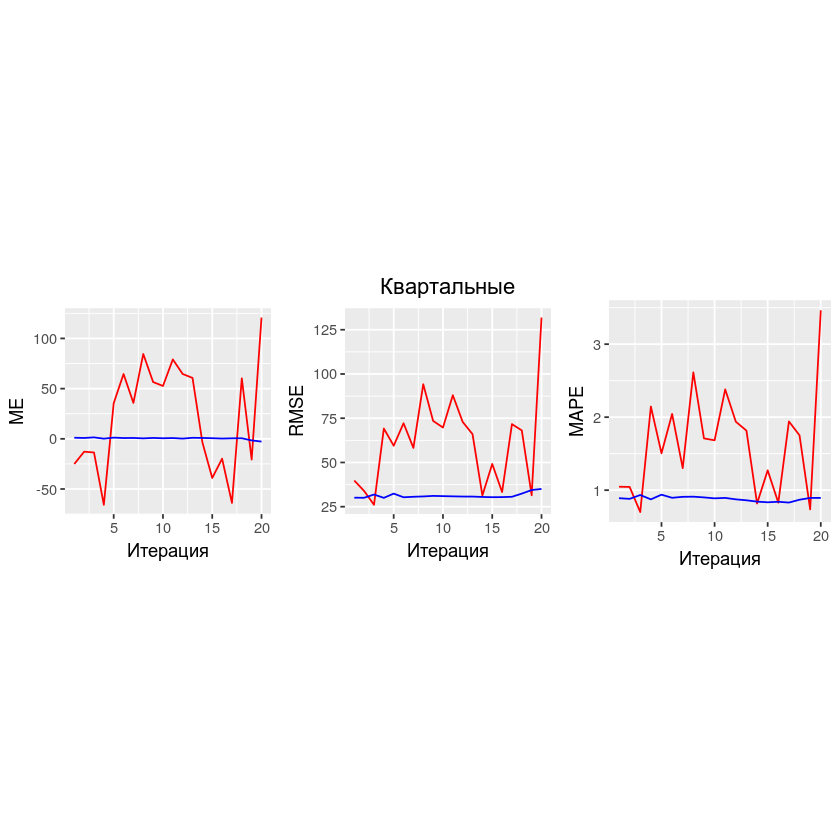

In [16]:
library(gridExtra)
grid.arrange(grobs = plots_train_test, ncol = 3)

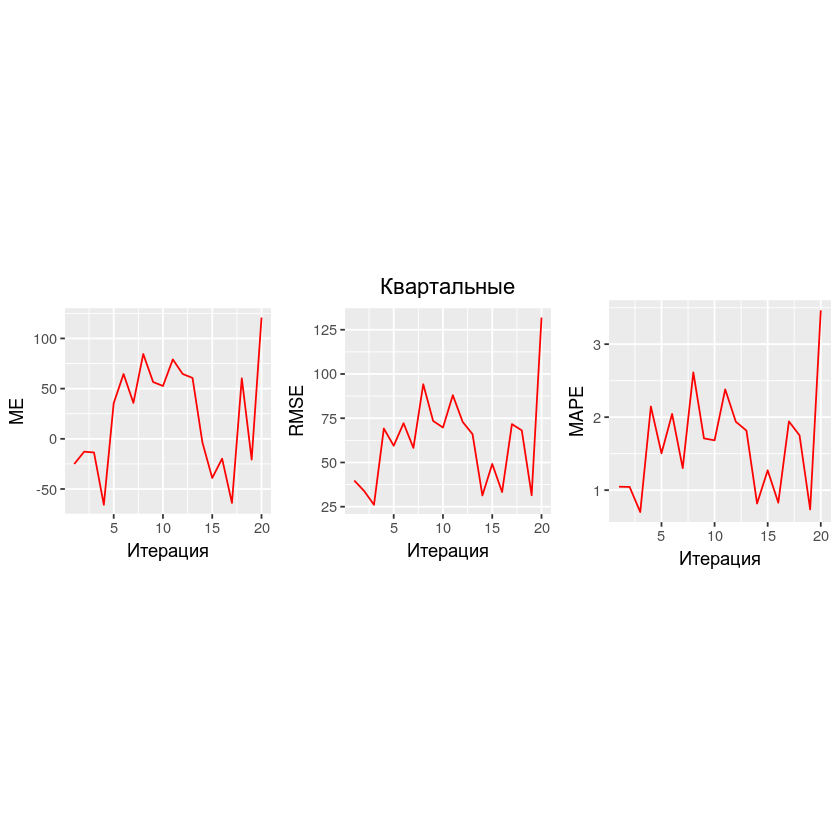

In [17]:
# Basic line plot with points

plots_test_all  <-  list()

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3)

In [18]:
# Basic line plot with points

plots_test_not_all  <-  list()

var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 0
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Квартальные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

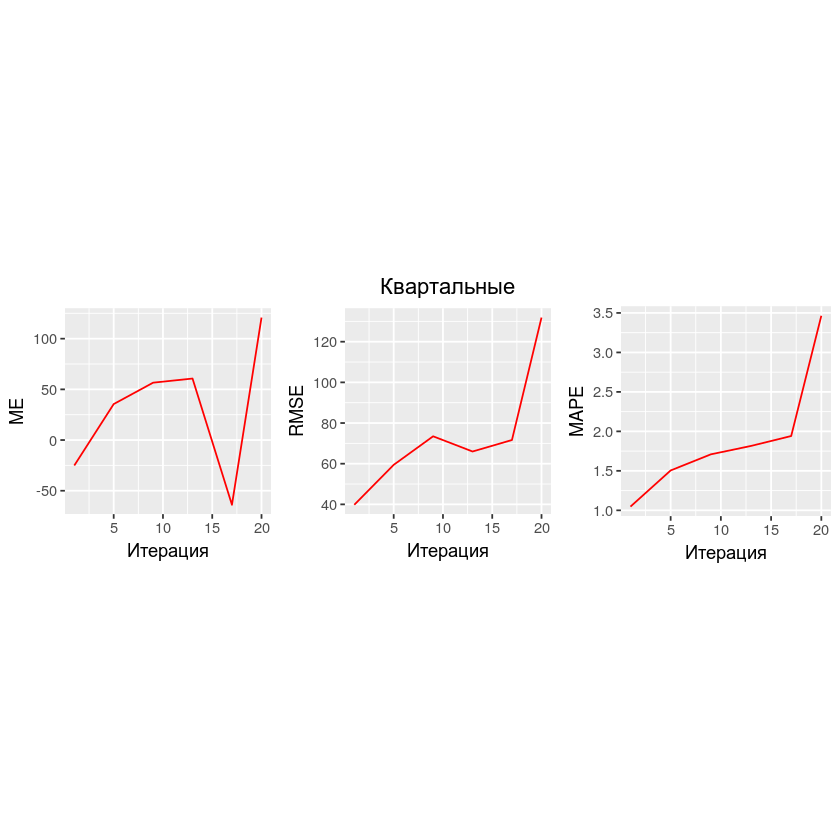

In [19]:
grid.arrange(grobs = plots_test_not_all, ncol = 3)

In [20]:
var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )
df_mean_acc  <-  data.frame(matrix(ncol=3, nrow = 5))
colnames(df_mean_acc)  <-  c('AR(3)SAR(2)', 'AR(4)', 'AR(11)SAR(2)' )
rownames(df_mean_acc)[1]  <-  '1 level'
df_mean_acc[1,1]  <-  colMeans(df_acc[var_not_all,])[[5]] 
df_mean_acc

,AR(3)SAR(2),AR(4),AR(11)SAR(2)
1 level,73.71452,NA,NA
2,NA,NA,NA
3,NA,NA,NA
4,NA,NA,NA
5,NA,NA,NA



## США

In [22]:
df_eu  <-  read.csv(file="../data_hts/hts_us_ind_filled.csv", header=TRUE, sep=",", row.names =1 )

In [23]:
df_eu  <-  df_eu/1000

In [24]:
var_freq  <- 4    
var_start_year  <- 2005  

In [25]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [26]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [27]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [28]:
var_h  <- 8

In [29]:
length(gdp_agg)-8

[1] 46

In [30]:
gdp_agg

         Qtr1     Qtr2     Qtr3     Qtr4
2005 14810.82 14901.49 15022.51 15101.40
2006 15314.55 15358.25 15361.53 15464.20
2007 15476.48 15549.12 15617.51 15731.15
2008 15625.38 15697.53 15581.97 15215.99
2009 15077.69 15056.99 15107.67 15245.91
2010 15272.78 15415.95 15513.26 15593.13
2011 15535.51 15632.94 15617.13 15821.82
2012 15927.61 15976.18 15983.30 15994.87
2013 16128.30 16136.38 16254.91 16372.60
2014 16316.98 16522.48 16733.98 16809.04
2015 16949.40 17070.24 17129.69 17147.05
2016 17237.31 17306.78 17369.38 17427.95
2017 17501.51 17637.46 17757.34 17851.87
2018 17934.57 18122.00                  

In [31]:
var_freq  <- 4    
var_start_year  <- 2005   
var_h  <- 8
var_window  <-  28 - 1
var_topup  <-  2
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

In [32]:
var_cv_low   <- var_window + 1
var_cv_high   <- length(gdp_agg) - var_h

In [33]:
gdp_arima_top_cv <- function(x, h){forecast(Arima(ts(x, 
    frequency = var_freq, start = var_start_year), order=c(4,0,0), 
    include.drift = TRUE, include.constant = TRUE), h=h)}
e_arima_top  <-  tsCV(gdp_agg, gdp_arima_top_cv, h=var_h, 
                      window=var_window)[var_cv_low:var_cv_high,]
sqrt(mean(e_arima_top^2, na.rm=TRUE))

[1] 444.403

In [34]:
ac <- list()

for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
    print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
        test <- window(gdp_agg, start=test_start-1/var_freq)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

    test <- window(gdp_agg, start=test_start, end=test_end)
    
    print(c(length(train), length(test)))

    
    gdp_arima  <- forecast(Arima(train, order=c(4,0,0), 
    include.drift = TRUE, include.constant = TRUE), h = var_h  )
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    
    }

[1] 2005.00 2011.75 2012.00 2013.75
[1] 28  8
[1] 2005.25 2012.00 2012.25 2014.00
[1] 28  8
[1] 2005.50 2012.25 2012.50 2014.25
[1] 28  8
[1] 2005.75 2012.50 2012.75 2014.50
[1] 28  8
[1] 2006.00 2012.75 2013.00 2014.75
[1] 28  8
[1] 2006.25 2013.00 2013.25 2015.00
[1] 28  8
[1] 2006.50 2013.25 2013.50 2015.25
[1] 28  8
[1] 2006.75 2013.50 2013.75 2015.50
[1] 28  8
[1] 2007.00 2013.75 2014.00 2015.75
[1] 28  8
[1] 2007.25 2014.00 2014.25 2016.00
[1] 28  8
[1] 2007.50 2014.25 2014.50 2016.25
[1] 28  8
[1] 2007.75 2014.50 2014.75 2016.50
[1] 28  8
[1] 2008.00 2014.75 2015.00 2016.75
[1] 28  8
[1] 2008.25 2015.00 2015.25 2017.00
[1] 28  8
[1] 2008.50 2015.25 2015.50 2017.25
[1] 28  8
[1] 2008.75 2015.50 2015.75 2017.50
[1] 28  8
[1] 2009.00 2015.75 2016.00 2017.75
[1] 28  8
[1] 2009.25 2016.00 2016.25 2018.00
[1] 28  8
[1] 2009.50 2016.25 2016.50 2018.25
[1] 28  8


In [35]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [36]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [37]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [38]:
colMeans(df_acc)

ME_train  RMSE_train  MAPE_train     ME_test   RMSE_test   MAPE_test 
 -1.3199454  92.1766931   0.4596319 352.3749245 406.2963381   2.0934213 
  Iteration 
 10.0000000

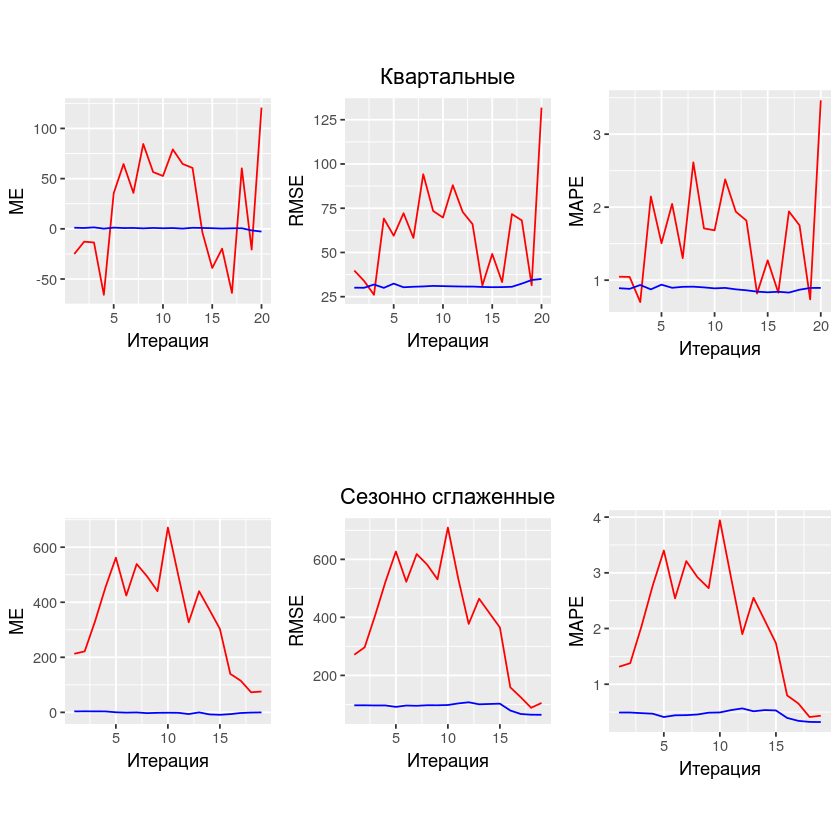

In [39]:
var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))   
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }



grid.arrange(grobs = plots_train_test, ncol = 3, nrow =2)

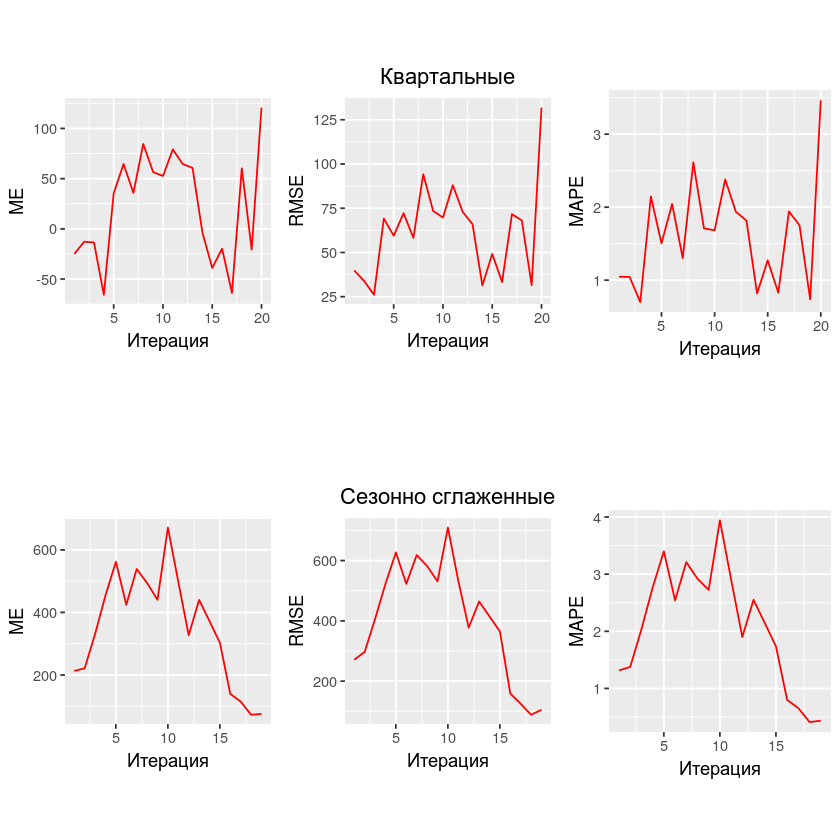

In [40]:
# Basic line plot with points
var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3, nrow = 2)

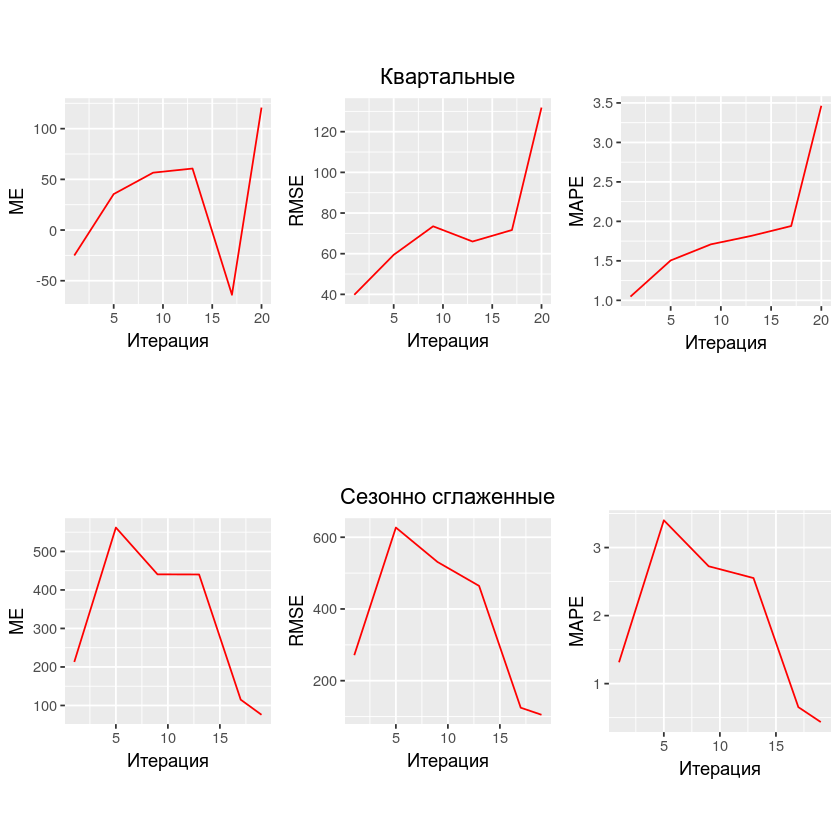

In [41]:
# Basic line plot with points

var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 3
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Сезонно сглаженные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_not_all, ncol = 3)

In [42]:
var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )
rownames(df_mean_acc)[1]  <-  '1 level'
df_mean_acc[1,2]  <-  colMeans(df_acc[var_not_all,])[[5]] 
df_mean_acc

,AR(3)SAR(2),AR(4),AR(11)SAR(2)
1 level,73.71452,353.9011,NA
2,NA,NA,NA
3,NA,NA,NA
4,NA,NA,NA
5,NA,NA,NA



## РФ


In [43]:
df_eu  <-  read.csv(file="../data_hts/hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [44]:
df_eu  <-  df_eu

In [45]:
var_freq  <- 12    
var_start_year  <- 2006

In [46]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [47]:
train_end_year  <-  2016
tset_start_year  <-  2017

In [48]:
train <- window(gdp_agg, end=c(train_end_year,var_freq))
test <- window(gdp_agg, start=c(tset_start_year,1))

In [49]:
var_h  <- 24

In [50]:
var_window  <-  96
var_cv_low   <- 96
var_cv_high   <- 156-24

In [51]:
96-12

[1] 84

In [52]:
var_freq  <- 12    
var_start_year  <- 2006   
var_h  <- 24
var_window  <-  84 - 1
var_topup  <-  -1
var_iter   <- (length(gdp_agg)+var_topup)/var_freq-(var_window+1)/var_freq-2

In [53]:
var_cv_low   <- var_window + 1
var_cv_high   <- length(gdp_agg) - var_h

In [54]:
time(gdp_agg)[1:12]

[1] 2006.000 2006.083 2006.167 2006.250 2006.333 2006.417 2006.500 2006.583
 [9] 2006.667 2006.750 2006.833 2006.917

In [55]:
require(svMisc)

Loading required package: svMisc

Attaching package: ‘svMisc’

The following object is masked from ‘package:utils’:

    ?



In [56]:
# gdp_arima_top_cv <- function(x, h){forecast(Arima(ts(x, 
#     frequency = var_freq, start = var_start_year), order=c(11,0,0),
#     seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE), h=h)}
# e_arima_top  <-  tsCV(gdp_agg, gdp_arima_top_cv, h=var_h, 
#                       window=var_window)[var_cv_low:var_cv_high,]
# sqrt(mean(e_arima_top^2, na.rm=TRUE))

In [57]:
ac <- list()
err_list  <- c()
for (i in 0:(var_iter*var_freq - var_topup)){
    st_year  <-  var_start_year + i/var_freq
    train_start  <- st_year 
    train_end  <- st_year + 1/var_freq*(var_window)
    test_start  <- st_year + 1/var_freq*(var_window+1) 
    test_end  <-  st_year + 1/var_freq*(var_window+var_h)
    
#     print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == var_iter*var_freq){
        test <- window(gdp_agg, start=test_start-1/var_freq)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }

    test <- window(gdp_agg, start=test_start, end=test_end)
    
#     print(c(length(train), length(test)))

    
    model  <-  tryCatch( list(Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "ML") , 0), 
            error = function(e) 
               {tryCatch( list( Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "CSS"), i+1), 
                         error = function(e)              
                            list( Arima(train, order=c(11,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.constant = TRUE, method = "CSS", optim.method = "CG"), i+1))
                         }
    )
    
    
    gdp_arima  <- forecast(model[[1]], h = var_h  )
    
    if (model[[2]]!=0){
        err_list <-  c(err_list,model[[2]])
    }
    
    ac[[i+1]]  <-  accuracy(gdp_arima, test)
    progress(i, progress.bar = TRUE)

    }

          0%---------25%---------50%---------75%--------100%
Progress: ||||||||||||||||||||||||

In [58]:
var_acc_metrics  <-  c(1,2,5)
cn  <- colnames(ac[[1]])[var_acc_metrics]

In [59]:
ac_list  <- list()
k=0
df_acc  <-  data.frame(matrix(ncol=2*length(var_acc_metrics),nrow=length(ac)))
colnames(df_acc)  <-  colnames(ac[[1]])[var_acc_metrics] 
df_acc  <-  cbind(df_acc, seq(1, length(ac)))
for (i in var_acc_metrics){
    k=k+1    
    for (j in 1:length(ac)){
        for (l in 1:2){
            m = k + (l-1)*3
            if (l == 1){
                colnames(df_acc)[m]  <-  paste(cn[k],'train', sep="_")
             } else {
                colnames(df_acc)[m]  <-  paste(cn[k],'test', sep="_")
            }   
            df_acc[j,m] <- ac[[j]][l,i] 
        }
    }
}

In [60]:
colnames(df_acc)[2*length(var_acc_metrics)+1]  <-  'Iteration'

In [61]:
colMeans(df_acc)

ME_train   RMSE_train   MAPE_train      ME_test    RMSE_test    MAPE_test 
    77.17119   6169.80961    155.21008 -11733.67168  14535.82379    267.52166 
   Iteration 
    25.50000

In [62]:
var_col_test  <-  'blue'
var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_train)) +
            geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_train)) +
            geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_train_test[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_train)) +
            geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

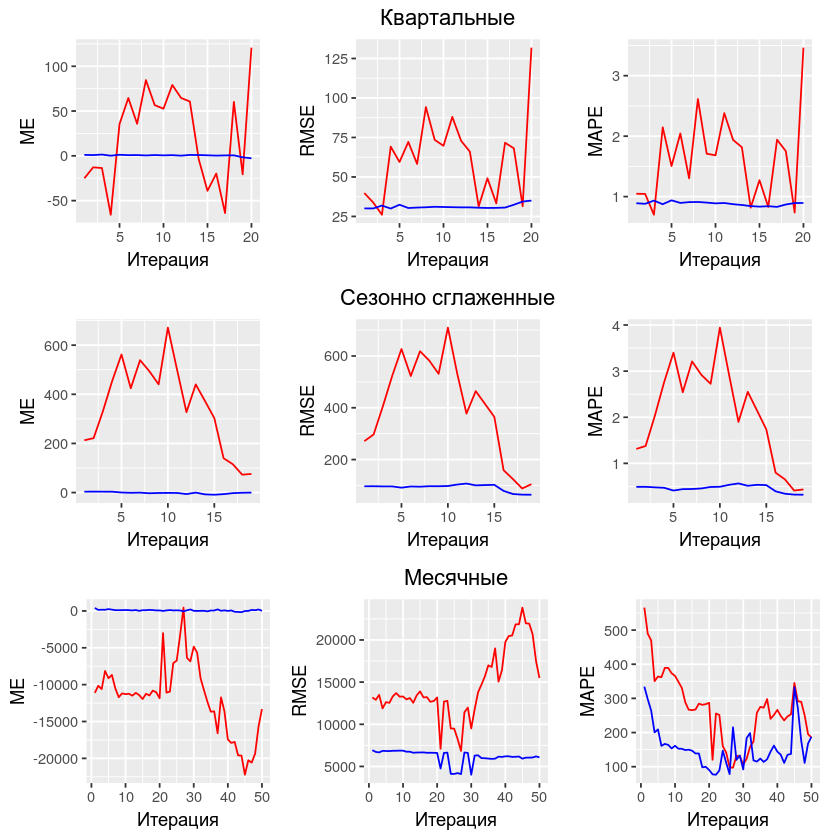

In [63]:
grid.arrange(grobs = plots_train_test, ncol = 3, nrow =3)

In [64]:
err_list

[1] 21 24 25 26 27 30

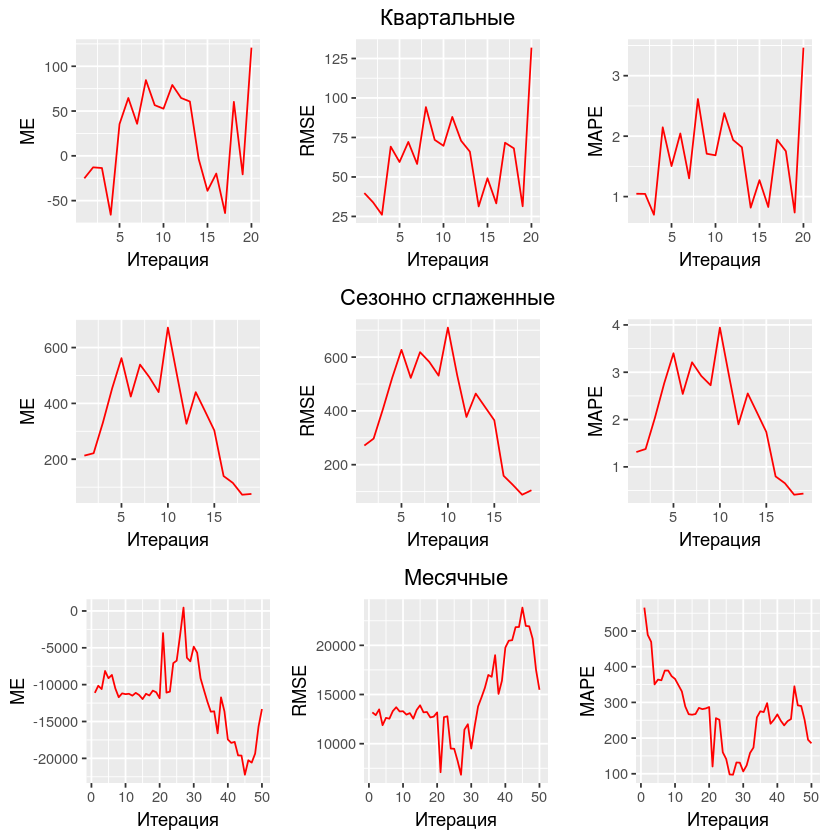

In [65]:
# Basic line plot with points

var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_all[[k]]  <- ggplot(data=df_acc, aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

grid.arrange(grobs = plots_test_all, ncol = 3)

In [66]:
var_not_all  <-  df_acc$Iteration[c(T, rep(F,var_freq-1))]
var_not_all

[1]  1 13 25 37 49

In [67]:
var_col_test  <-  'red'
# var_col_train  <-  'red'

for (i in 1:3) {
    
    k = i + 6
    
    if  (i==1) {
        
        plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=ME_test)) +
#             geom_line(aes(x=Iteration, y=ME_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test) + labs(title = " ")  +
            theme(aspect.ratio = 1)+
            labs(y = "ME", x = 'Итерация')
        } else if (i==2) { 
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=RMSE_test)) +
#             geom_line(aes(x=Iteration, y=RMSE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+
            theme(aspect.ratio = 1)+
            labs(y = "RMSE", x = 'Итерация')+ labs(title = "Месячные") +
            theme(plot.title = element_text(hjust = 0.5))       
        } else if (i==3)  {
            plots_test_not_all[[k]]  <- ggplot(data=df_acc[var_not_all, ], aes(x=Iteration, y=MAPE_test)) +
#             geom_line(aes(x=Iteration, y=MAPE_test), colour = var_col_train ) + 
            geom_line(colour=var_col_test)+ labs(title = " ") +
            theme(aspect.ratio = 1)+
            labs(y = "MAPE", x = 'Итерация')   
    }        
    }

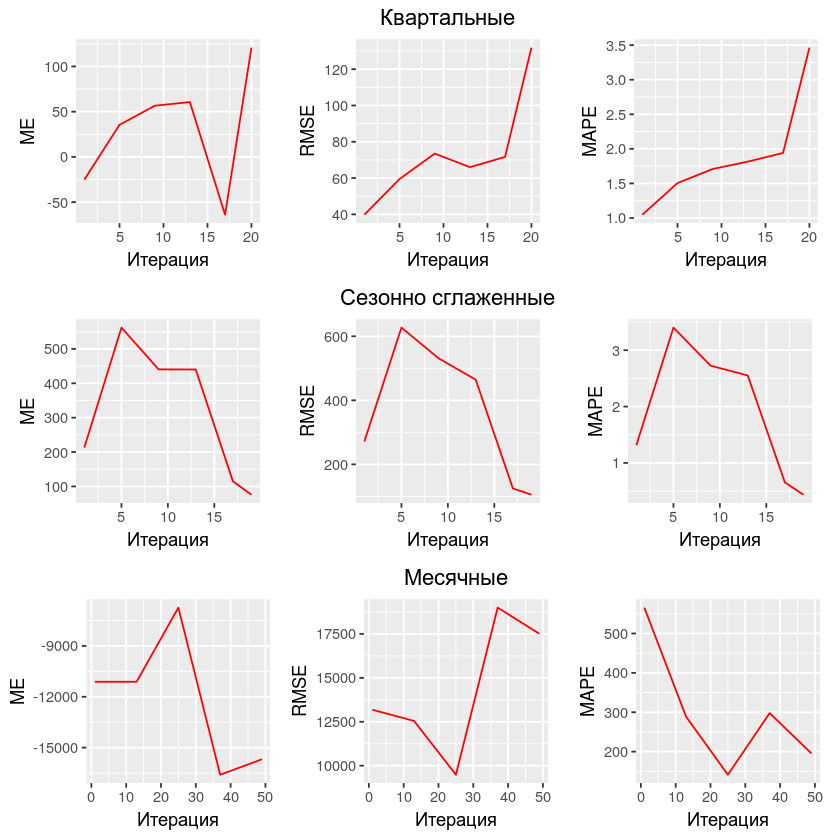

In [68]:
grid.arrange(grobs = plots_test_not_all, ncol = 3)

In [773]:
# Save a single object to a file
saveRDS(plots_train_test, "plots_train_test.rds")
saveRDS(plots_test_all, "plots_test_all.rds")
saveRDS(plots_test_not_all, "plots_test_not_all.rds")
# Restore it under a different name
# my_data <- readRDS("mtcars.rds")

In [774]:
var_not_all  <-  c(df_acc$Iteration[c(T, rep(F,var_freq-1))], df_acc$Iteration[length(df_acc$Iteration)] )
rownames(df_mean_acc)[1]  <-  '1 level'
df_mean_acc[1,3]  <-  colMeans(df_acc[var_not_all,])[[5]] 
df_mean_acc

,AR(3)SAR(2),AR(4),AR(11)SAR(2)
1 level,73.71452,353.9932,14576.08
2,NA,NA,NA
3,NA,NA,NA
4,NA,NA,NA
5,NA,NA,NA


In [775]:
saveRDS(df_mean_acc, "df_mean_acc.rds")